In [106]:
#Importing Libraries
import pandas as pd
import math
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [120]:
#Importing data
df = pd.read_csv('Salary_Data.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [121]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
'''
data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)
'''
#x=df[['YearsExperience']]
#y=df[['Salary']]


'\ndata.iloc[:,0] # first column of data frame (first_name)\ndata.iloc[:,1] # second column of data frame (last_name)\ndata.iloc[:,-1] # last column of data frame (id)\n'

In [122]:
#Spliting data 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25)

In [123]:
#Least squares model
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
print('LINEAR MODEL')
print('y = ' , float(lr_model.coef_[0]) , ' * x + ' , float(lr_model.intercept_))
print('Training score: {}'.format(lr_model.score(x_train, y_train)))
print('Test score: {}'.format(lr_model.score(x_test, y_test)))
y_pred = lr_model.predict(x_test)

LINEAR MODEL
y =  9323.255461045848  * x +  26940.845322751746
Training score: 0.9629738362441506
Test score: 0.9291620608559368


In [124]:
#Least squares error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 6422.41363136308


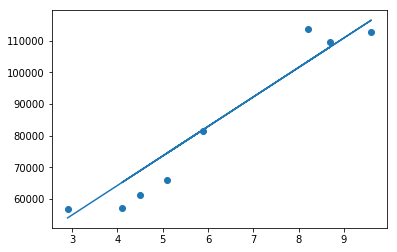

In [129]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [126]:
#Ridge model (L2 Regularization)
ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
print('RIDGE MODEL')
print('y = ' , float(ridge.coef_[0]) , ' * x + ' , float(ridge.intercept_))
print('Training Score: {}'.format(ridge.score(x_train, y_train)))
print('Test Score: {}'.format(ridge.score(x_test, y_test)))
print('')
y_ridge_pred = ridge.predict(x_test)

RIDGE MODEL
y =  9273.160792090815  * x +  27192.229479689726
Training Score: 0.9629460351210294
Test Score: 0.928588608128976



In [127]:
#Lasso model (L1 Regularization)
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
print('LASSO MODEL')
print('y = ' , float(lasso.coef_[0]) , ' * x + ' , float(lasso.intercept_))
print('Training Score: {}'.format(lasso.score(x_train, y_train)))
print('Test Score: {}'.format(lasso.score(x_test, y_test)))

y_lasso_pred = lasso.predict(x_test)


LASSO MODEL
y =  9323.254272580836  * x +  26940.85128668526
Training Score: 0.9629738362441348
Test Score: 0.9291620479036378


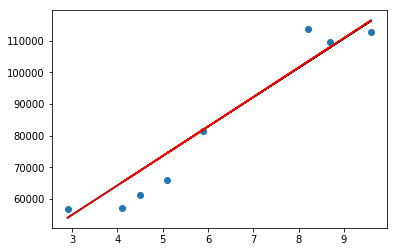

In [130]:
#Plots
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)
plt.plot(x_test,y_ridge_pred,color='black')
plt.plot(x_test, y_lasso_pred, color='red')
